In [ ]:
#CA_TWO - Machine Learning and Pattern Recognition
#Team Members:
         

**Task 2 : Using the hand gestures dataset available on the Moodle page, create a hand gesture recognition 
app in Python. Apply at least three classifiers and compare their performance**

In [ ]:
#Importing the useful Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
#Using pandas to read the mnist dataset and pythons head() to cross check the datatype
dataframe = pd.read_csv('sample_data/sign_mnist.csv')
dataframe.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [ ]:
#Storing label values in dataframe_labels variable and using Numpy np.unique to get unique labels 
dataframe_labels=dataframe['label'].values
unique_labels = np.unique(dataframe_labels)
unique_labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [ ]:
#Checking dataframe shape:
dataframe.shape

(10000, 785)

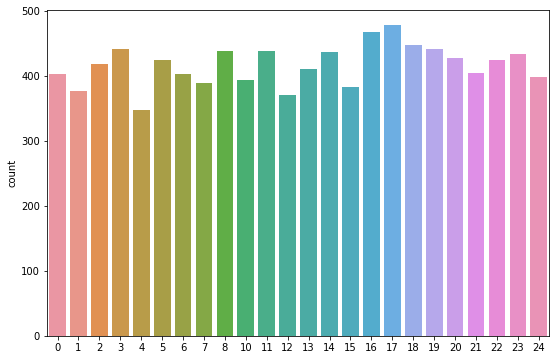

In [ ]:
#Plotting the label quantities:

plt.figure(figsize=(9,6))
sns.countplot(x=dataframe_labels)

In [ ]:
#Reading total count of each labels in decending order
dataframe['label'].value_counts().sort_values(ascending=False)

17    478
16    468
18    448
19    442
3     442
11    438
8     438
14    436
23    433
20    428
22    425
5     424
2     419
13    411
21    405
6     403
0     403
24    399
10    393
7     389
15    383
1     377
12    370
4     348
Name: label, dtype: int64

In [ ]:
# Dropping the label column from our dataset
dataframe.drop('label',axis=1,inplace=True)

In [ ]:
#Checking the dataframe size after dropping the Label column
dataframe.shape

(10000, 784)

In [ ]:
#Extracting the image data from each row in our dataset (28X28 pixel images)
images = dataframe.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten()for i in images])

In [ ]:
#Applying one hot encoder for binary mapping of labels into integer and binary vector
from sklearn.preprocessing import LabelBinarizer

label_binarizer =LabelBinarizer()
labels = label_binarizer.fit_transform(dataframe_labels)

In [ ]:
#After applying one hot encoder viewing our Labels:
print(labels)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]


[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


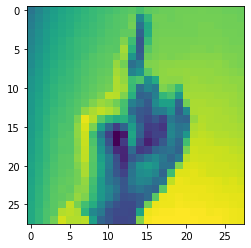

In [ ]:
#Inspecting the Image for letter D:

index_no =0
print(labels[index_no])
plt.imshow(images[index_no].reshape(28,28))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


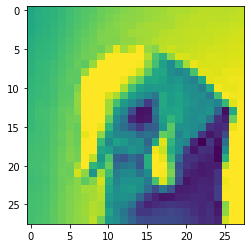

In [ ]:
#Inspecting the Image for letter Q:
index_no =5
print(labels[index_no])
plt.imshow(images[index_no].reshape(28,28))

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


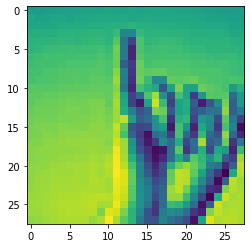

In [ ]:
#Inspecting the Image for letter I:
index_no =6
print(labels[index_no])
plt.imshow(images[index_no].reshape(28,28))

In [ ]:
#Splitting the data into X_train , X_test , y_train , y_test

from sklearn.model_selection import train_test_split
X_train , X_test , y_train ,y_test = train_test_split(images , labels , test_size=0.3 , random_state=10)

In [ ]:
#Checking the shape of X_train, X_test, y_train, y_test
print('X_train.shape :',X_train.shape)
print('X_test.shape :', X_test.shape)
print('y_train.shape :', y_train.shape)
print('y_test.shape :', y_test.shape)

X_train.shape : (7000, 784)
X_test.shape : (3000, 784)
y_train.shape : (7000, 24)
y_test.shape : (3000, 24)


In [ ]:
X_test.shape

(3000, 784)

In [ ]:
y_train.shape

(7000, 24)

In [ ]:
y_test.shape

(3000, 24)

**Modifiers**

**DecisionTreeClassifier**

In [ ]:
#Model 1: DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dec_tree= DecisionTreeClassifier(max_depth=10)
data_model1 = dec_tree.fit(X_train,y_train)

In [ ]:
#Prediction check on the model : DecisionTreeClassifier
y_predict_test =data_model1.predict(X_test)
y_predict_train=data_model1.predict(X_train)

In [ ]:
#Accuracy checking on the model : DecisionTreeClassifier
print("Train Data accuracy using Decision Tree clasifier is:",accuracy_score(y_train , y_predict_train))
print("Test Data accuracy using Decision Tree clasifier is :",accuracy_score(y_test , y_predict_test))

Train Data accuracy using Decision Tree clasifier is: 0.598
Test Data accuracy using Decision Tree clasifier is : 0.4673333333333333


**Random Forest Classifier**

In [ ]:
#Model 2: RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier(n_estimators=100,max_depth=15,random_state=10)
data_model2 = rand_forest.fit(X_train,y_train)

In [ ]:
#Prediction check on the model : RandomForestClassifier
y_predict_test_rf =data_model2.predict(X_test)
y_predict_train_rf=data_model2.predict(X_train)

In [ ]:
#Accuracy checking on the model : RandomForestClassifier
print("Train Data accuracy using Random Forest clasifier is:",accuracy_score(y_train , y_predict_train_rf))
print("Test Data accuracy using Random Forest clasifier is:",accuracy_score(y_test , y_predict_test_rf))

Train Data accuracy using Random Forest clasifier is: 0.9657142857142857
Test Data accuracy using Random Forest clasifier is: 0.6243333333333333


**CNN Model**

In [ ]:
#Model 3: CNN Model
# Starting and loading tensorflow modules and defining the batch size 
from tensorflow.keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout

batch_size =200
num_classes=24
epochs=35

In [ ]:
#Scaling the Images
X_train =X_train/255
X_test =X_test/255

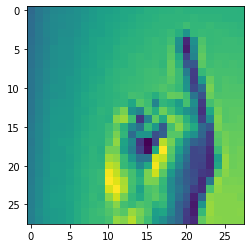

In [ ]:
# Reshaping the size required by TF and Keras
X_train =X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

plt.imshow(X_train[0].reshape(28,28))

In [ ]:
# Creating the CNN model 

from tensorflow.keras.layers import Convolution2D,MaxPooling2D
from tensorflow.keras import backend as k
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Convolution2D(3,3, activation ='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D (pool_size=(2,2)))

model.add(Convolution2D(3,3, activation ='relu'))
model.add(MaxPooling2D (pool_size=(2,2)))

model.add(Convolution2D(3,3, activation ='relu'))
model.add(MaxPooling2D (pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation ='relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes , activation ='softmax'))

In [ ]:
#Complining the CNN Model

model.compile(loss='categorical_crossentropy',optimizer=Adam(), metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 3)         30        
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 3)        0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 3)         84        
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 3)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 3)           84        
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 1, 1, 3)         

In [ ]:
#Fitting the CNN Model :
history = model.fit(X_train , y_train , validation_data =(X_test,y_test),epochs =epochs,batch_size=batch_size)

Epoch 1/35
35/35 [==============================] - 3s 58ms/step - loss: 3.1765 - accuracy: 0.0464 - val_loss: 3.1708 - val_accuracy: 0.0630
Epoch 2/35
35/35 [==============================] - 2s 52ms/step - loss: 3.1626 - accuracy: 0.0669 - val_loss: 3.1451 - val_accuracy: 0.0900
Epoch 3/35
35/35 [==============================] - 2s 52ms/step - loss: 3.1182 - accuracy: 0.0651 - val_loss: 3.0774 - val_accuracy: 0.0933
Epoch 4/35
35/35 [==============================] - 2s 52ms/step - loss: 3.0338 - accuracy: 0.0849 - val_loss: 2.9905 - val_accuracy: 0.0967
Epoch 5/35
35/35 [==============================] - 2s 52ms/step - loss: 2.9540 - accuracy: 0.0903 - val_loss: 2.9197 - val_accuracy: 0.1047
Epoch 6/35
35/35 [==============================] - 2s 52ms/step - loss: 2.9075 - accuracy: 0.0990 - val_loss: 2.8841 - val_accuracy: 0.1107
Epoch 7/35
35/35 [==============================] - 2s 53ms/step - loss: 2.8809 - accuracy: 0.1041 - val_loss: 2.8607 - val_accuracy: 0.1123
Epoch 8/35
35

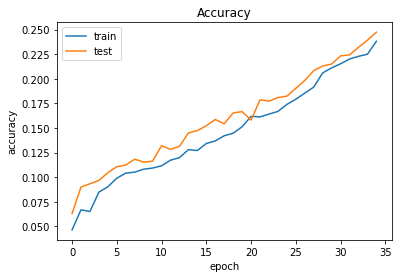

In [ ]:
#Model evaluation and viewing model history graphically 

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [ ]:
#Evaluating the model accuracy
(ls,acc)=model.evaluate(x=X_test,y=y_test)

94/94 [==============================] - 1s 6ms/step - loss: 2.2877 - accuracy: 0.2473


In [ ]:
#Convering calculated model accuracy into percentage
print("Model Accuracy={}%".format(acc*100))

Model Accuracy=24.73333328962326%


**Compairing all the three models together and conclude with the best fit model**

In [ ]:
#Compairing all the three models together and conclude the best fit model
data_models = {'Model':['Decision Tree','Random Forest','CNN Model'],'Accuracy_of_Train_Data':[0.59 ,0.96,2.9] ,'Accurcay_of_Test_Data':[0.47,0.62,0.24]}

In [ ]:
#Best fit model
data_model_compare = pd.DataFrame(data_models)
data_model_compare

,Model,Accuracy_of_Train_Data,Accurcay_of_Test_Data
0,Decision Tree,0.59,0.47
1,Random Forest,0.96,0.62
2,CNN Model,0.00,0.00


**Result : As per the above table we can conclude, with 96% accuracy the performance of Random Forest Classifier is best than compared to Decision tree and CNN model.**